In [ ]:
# uncomment this line if you need to install pyphyschemtools
# !pip install pyphyschemtools

In [ ]:
# This now triggers vID.init() automatically via __init__.py
import pyphyschemtools as t4pPC
from pyphyschemtools import fg, hl, bg, color

t4pPC.init('t4pPC')
%matplotlib inline

# this is a helper function made to easily retrieve absolute paths for built-in example files (XYZ, Excel, etc.)
# that are available in the data_examples/ subfolder as part of the pyphyschemtools library
from pyphyschemtools import get_ppct_data

# tools for pyPhysChem

## `cheminformatics.py`

### `easy_rdkit` class

#### Basic use

While standard chemical drawings often omit conjugation or hybridization states, easy_rdkit allows for their explicit visualization, making it an ideal tool for teaching structural organic chemistry.

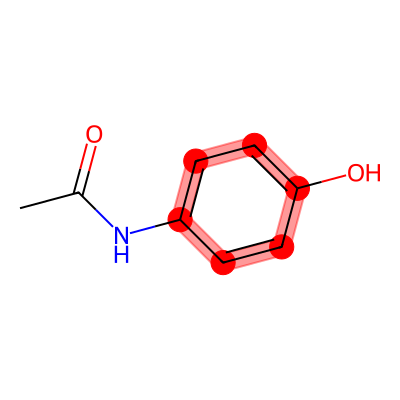

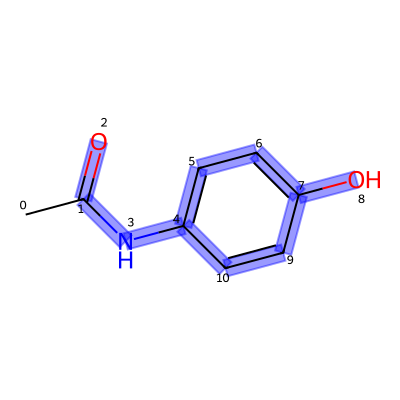

In [1]:
import pyphyschemtools as t4pPC
from pyphyschemtools import easy_rdkit

mol = easy_rdkit("CC(=O)NC1=CC=C(C=C1)O")

t4pPC.centerTitle("Aromatic part")
mol.show_mol(plot_aromatic=True)

t4pPC.centerTitle("Conjugated part")
mol.show_mol(plot_conjugation=True, show_n=True)


#### Comprehensive Electronic View: Lewis structure

This example showcases how `easy_rdkit` simplifies the transition from a SMILES string to a detailed basic electronic analysis. By enabling the Lewis and hybridization flags, the library automatically calculates and overlays lone pairs, electron vacancies, and orbital states directly onto the molecular graph, providing a clear visual bridge between chemical structure and bonding theory.

,index atome,symbole,e- valence,e- liants,charge formelle,doublets non-liants (DNL),lacunes ([]),nombre de liaisons,e- total (octet ?),O/H/D ?
0,0,C,4,4,0,0,0,4,8,✅ octet
1,1,C,4,4,0,0,0,4,8,✅ octet
2,2,O,6,2,0,2,0,2,8,✅ octet
3,3,N,5,3,0,1,0,3,8,✅ octet
4,4,C,4,4,0,0,0,4,8,✅ octet
5,5,C,4,4,0,0,0,4,8,✅ octet
6,6,C,4,4,0,0,0,4,8,✅ octet
7,7,C,4,4,0,0,0,4,8,✅ octet
8,8,O,6,2,0,2,0,2,8,✅ octet
9,9,C,4,4,0,0,0,4,8,✅ octet


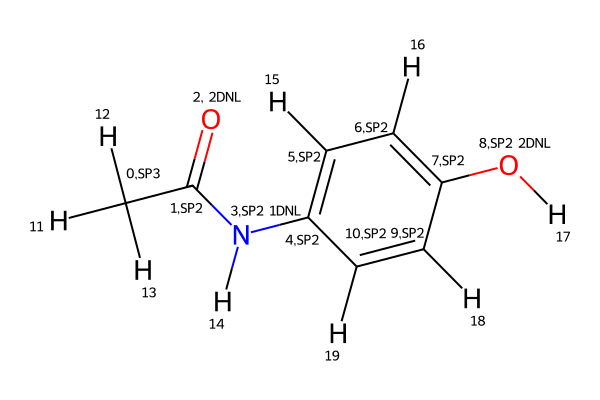

In [2]:
import pyphyschemtools as t4pPC
from pyphyschemtools import easy_rdkit

t4pPC.centerTitle("Lewis & hybridization")
mol = easy_rdkit("CC(=O)NC1=CC=C(C=C1)O", lang="Fr")
mol.show_mol(show_Lewis=True, show_n=True, show_hybrid=True, size=(600,400))


#### Fetching a molecule directly from PubChem

PubChem is the world's largest collection of freely accessible chemical information, maintained by the National Institutes of Health (NIH). It serves as a comprehensive authority for chemical structures, identifiers, and biological activities.

By integrating the PubChem Compound ID (CID) system, easy_rdkit allows you to bypass manual string entry. This ensures that the molecular structure is retrieved directly from a standardized, peer-reviewed source, significantly reducing errors for complex scaffolds.

✅ Successfully retrieved: 1,3,7-trimethylpurine-2,6-dione


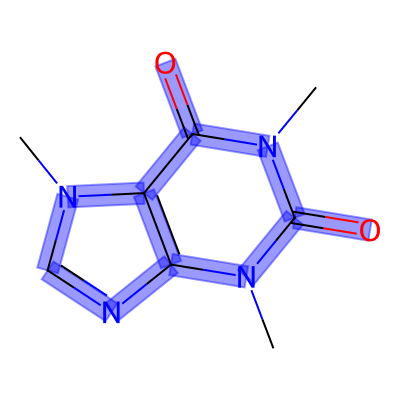

compound 2519 = 1,3,7-trimethylpurine-2,6-dione
RDKit-canonicalized SMILES = Cn1c(=O)c2c(ncn2C)n(C)c1=O


In [3]:
import pyphyschemtools as t4pPC
from pyphyschemtools import easy_rdkit

mol = easy_rdkit.from_cid(2519) #cafeine

t4pPC.centerTitle("Caffeine from PubChem")
mol.show_mol(plot_conjugation=True)
print(f"compound {mol.cid} = {mol.iupac_name}\nRDKit-canonicalized SMILES = {mol.smiles}")

#### Mastering complex geometries

Macrocycles (large rings) are notoriously difficult to represent clearly in 2D. Using the `macrocycle=True` flag triggers an optimized coordinate generation algorithm.


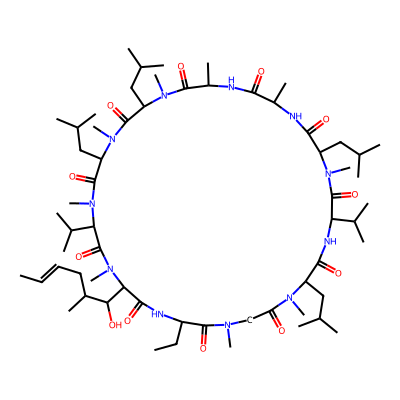

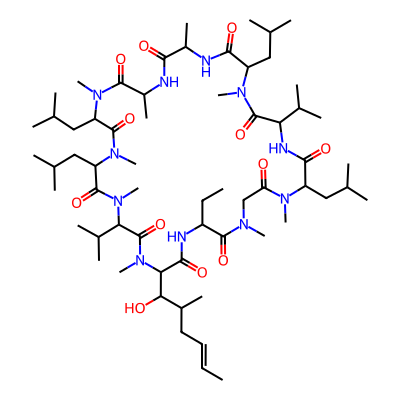

In [4]:
t4pPC.centerTitle("Better representation of macrocycles")
t4pPC.centertxt("without the 'macrocycle' option")
mol = easy_rdkit("C/C=C/CC(C)C(O)C1C(=O)NC(CC)C(=O)N(C)CC(=O)N(C)C(CC(C)C)C(=O)NC(C(C)C)C(=O)N(C)C(CC(C)C)C(=O)NC(C)C(=O)NC(C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(C(C)C)C(=O)N1C")
mol.show_mol()
t4pPC.centertxt("with the 'macrocycle' option")
mol.show_mol(macrocycle=True)

#### Calculation of molecular descriptors

This example highlights the seamless integration with PubChem and the automated extraction of molecular properties. By initializing a molecule via its Compound ID (CID), the library automatically retrieves the official IUPAC name and canonical SMILES, while providing a clear visualization of chemical features like &pi;-conjugation and a comprehensive table of calculated physicochemical descriptors.

✅ Successfully retrieved: 2-[4-(2-methylpropyl)phenyl]propanoic acid


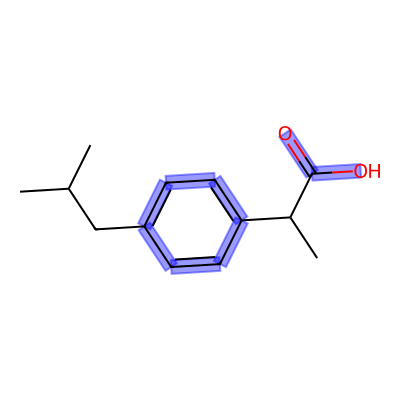

compound 3672 = 2-[4-(2-methylpropyl)phenyl]propanoic acid
RDKit-canonicalized SMILES = CC(C)Cc1ccc(C(C)C(=O)O)cc1

--------- Molecular Descriptors ---
Property             | Value     
-----------------------------------
MW                   | 206.28    
LogP                 | 3.07      
QED                  | 0.822     
HBA                  | 1         
HBD                  | 1         
RotB                 | 4         
TPSA                 | 37.3      
Aromatic Rings       | 1         
Non-Aromatic Rings   | 0         
Fsp3                 | 0.462     
Connectivity (Chi0)  | 11.422    
Connectivity (Chi1)  | 7.003     
-----------------------------------


In [5]:
import pyphyschemtools as t4pPC
from pyphyschemtools import easy_rdkit

mol = easy_rdkit.from_cid(3672) #ibuprofen

t4pPC.centerTitle("Ibuprofen from PubChem")
mol.show_mol(plot_conjugation=True)
print(f"compound {mol.cid} = {mol.iupac_name}\nRDKit-canonicalized SMILES = {mol.smiles}\n")
mol.show_descriptors()

#### Store descriptors in a dataframe

This example demonstrates how to efficiently transform a chemical library into a structured dataset. By consolidating multiple `easy_rdkit` instances into a pandas DataFrame, you can automatically aggregate IUPAC names, PubChem IDs, and molecular descriptors into a single table, creating a powerful foundation for data analysis or machine learning workflows.

In [6]:
import pyphyschemtools as t4pPC
from pyphyschemtools import easy_rdkit
import pandas as pd

# A list of molecules (some from CID, some from SMILES)
my_mols = [easy_rdkit.from_cid(3672), easy_rdkit("CC(C1=CC(=CC=C1)C(=O)C2=CC=CC=C2)C(=O)O"), easy_rdkit.from_cid(156391), easy_rdkit.from_cid(3033)]

t4pPC.centerTitle("Store descriptors in dataframes")
df = pd.DataFrame([m.to_dict(auto_fetch=True) for m in my_mols])
display(df)



✅ Successfully retrieved: 2-[4-(2-methylpropyl)phenyl]propanoic acid
✅ Successfully retrieved: (2S)-2-(6-methoxynaphthalen-2-yl)propanoic acid
✅ Successfully retrieved: 2-[2-(2,6-dichloroanilino)phenyl]acetic acid


✅ PubChem match found: 2-(3-benzoylphenyl)propanoic acid (CID: 3825)


,IUPAC Name,CID,SMILES,MW,LogP,QED,HBA,HBD,RotB,TPSA,Aromatic Rings,Non-Aromatic Rings,Fsp3,Connectivity (Chi0),Connectivity (Chi1)
0,2-[4-(2-methylpropyl)phenyl]propanoic acid,3672,CC(C)Cc1ccc(C(C)C(=O)O)cc1,206.28,3.07,0.822,1,1,4,37.3,1,0,0.462,11.422,7.003
1,2-(3-benzoylphenyl)propanoic acid,3825,CC(C(=O)O)c1cccc(C(=O)c2ccccc2)c1,254.28,3.11,0.853,2,1,4,54.4,2,0,0.125,13.828,9.092
2,(2S)-2-(6-methoxynaphthalen-2-yl)propanoic acid,156391,COc1ccc2cc(C(C)C(=O)O)ccc2c1,230.26,3.04,0.881,2,1,3,46.5,2,0,0.214,12.414,8.113
3,"2-[2-(2,6-dichloroanilino)phenyl]acetic acid",3033,O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl,296.15,4.36,0.881,2,2,4,49.3,2,0,0.071,13.828,9.075


#### Display the smiles of a dataframe on a grid, with legends

This final step illustrates the automated generation of a molecular gallery, translating your DataFrame back into a clean, visual grid. By specifying multiple legend columns, the method creates high-quality SVG panels with vertically stacked properties, providing an ideal format for data comparison and high-resolution export for scientific publications or student report.

✅ SVG saved to: <IPython.core.display.SVG object>


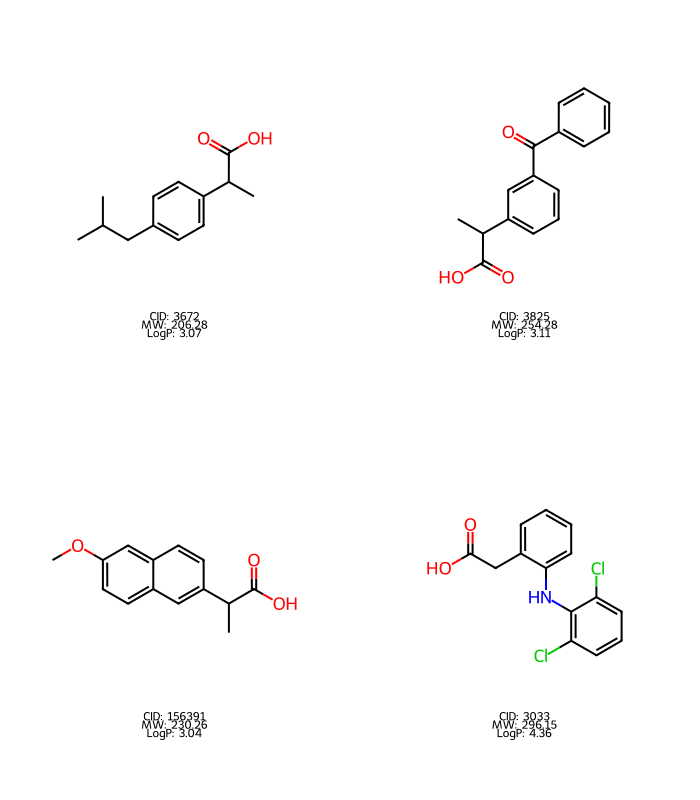

In [7]:
t4pPC.centerTitle("Draw molecules on a grid")
# Create a grid showing Name, Molecular Weight, and LogP
easy_rdkit.plot_grid_from_df(
    df, 
    smiles_col='SMILES', 
    legend_cols=['CID', 'MW', 'LogP'],
    mols_per_row=2,
    size=(350, 400),
    save_img="fig_examples/Molecules/gridMol.svg"
)

## `Chem3D.py`

### `molView` class

#### Basic use

In [ ]:
import pyphyschemtools as t4pPC
from pyphyschemtools import molView

t4pPC.centerTitle("Read coordinates from PubChem")
molView(338, source="cid")
t4pPC.centerTitle("Read coordinates from the Protein Data Bank")
molView("1HTB", source="rscb", style='cartoon', w=1000, h=600)
t4pPC.centerTitle("Read coordinates from the Crystallography Open Database")
mv = molView(1000058,'cod',w=600,h=600,supercell=(2,2,2))

#### Advanced use



In [ ]:
t4pPC.centerTitle("Read coordinates frbbom pubChem and show them in a grid")
import pubchempy as pcp
CIDs = [95417, 98039, 95336]
compounds = ["DBA","DBA5","DBA6"]

titles = []
for i, cid in enumerate(CIDs):
    t4pPC.centertxt(compounds[i])
    c = pcp.Compound.from_cid(cid)
    print("molecular formula = ",c.molecular_formula)
    print("IUPAC name = ",c.iupac_name)
    titles.append(f"{compounds[i]} ({cid})\n{c.iupac_name}")

molView.view_grid(CIDs, n_cols=3, source='cid', style='bs', titles=titles, w=400, detect_BondOrders=True)

In [ ]:
t4pPC.centerTitle("Calculate and display circumradius of a molecule")
m = molView(338, source="cid", display_now=False)
m.show_bounding_sphere()

In [33]:
t4pPC.centerTitle("Calculate and display a cavity, using the CageCavityCalc library")
file = get_ppct_data("Molecules/betaCD-closed.xyz")
m = molView(file, display_now=False)
m.show_cage_cavity(grid_spacing=0.4, color='cyan', opacity=0.8)
m.show_bounding_sphere()

Cavity Volume (CageCavityCalc): 168.75 Å³
Dimensions: 7.09 x 7.07 x 5.22 Å
Aspect Ratio (L/W): 1.00


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Bounding Sphere: Radius = 8.35 Å | Volume = 2436.99 Å³


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## `kinetics.py`

### `KORD` class, aka Kinetic Order of Reaction Determination

#### Simulation of the theoretical G property values as a function of the order

In [ ]:
import pyphyschemtools as t4pPC
from pyphyschemtools import KORD

simulation = KORD(a0=1, alpha=1, beta=1, k_guess=0.1, G_0_guess=20, G_inf_guess=50, t_simul_max=50)
simulation.simulate_plot()

#### Parameters fitting

In [ ]:
from pyphyschemtools import KORD

file = file = get_ppct_data("Kinetics/SuiviKin_BIPS_EtOAc.xlsx")
t, G, headers, parameters = KORD.load_from_excel(file, exp_number=1)
study = KORD(t, G, headers, a0=parameters[0], alpha=parameters[1], beta=parameters[2])
study.plot_all_fits("./fig_examples/Kinetics/SuiviKin_BIPS_EtOAc.svg")
# study.plot_all_fits()
study.get_best_order()

## `PeriodicTable.py`

### Classe `TableauPeriodique` (for French students)

#### Instanciation d'un tableau périodique et affichage

In [ ]:
import pyphyschemtools as t4pPC
from pyphyschemtools import TableauPeriodique

tp = TableauPeriodique()
tp.afficher()

#### Évolution des propriétés des éléments, périodicité

In [ ]:
display(tp.elements)

print(tp.elements.info())

In [ ]:
import matplotlib.pyplot as plt 

Z = tp.elements["atomic_number"]
Ei1 = tp.elements["Ei1"]
color = tp.elements["color"]

cm2i = 1/2.54 # conversion de cm en pouces
fig, ax = plt.subplots(figsize=(30*cm2i,12*cm2i))
xticks=[2,10,18,36,54,86,118]
ax.set_xticks(xticks)
plt.grid(color='r', linestyle='--', linewidth=0.5, axis="x")
plt.plot(Z,Ei1,linewidth=0.5)
plt.scatter(Z,Ei1,marker="o",c=color)
plt.xlabel("Numéro atomique (Z)")
plt.ylabel("Ei1 / eV")

t4pPC.save_fig("fig_examples/PeriodicTable/Ei1_Z.png")
plt.show()

## `spectra.py`

In [ ]:
import pyphyschemtools as t4pPC
from pyphyschemtools import SpectrumSimulator

t4pPC.centerTitle("Basic simulation. Superposotion of the vertical transitions and the similated spectrum")
file = get_ppct_data("Spectra/DBA-syn-syn-TDDFT_ethanol_ExcStab.dat")
fig = "fig_examples/Spectra/DBA-syn-syn-TDDFT_ethanol.png"
title = "DBA in ethanol"

sim = SpectrumSimulator(plotWH=(8,6))
sim.plotEps_lambda_TDDFT(file,lambdamin=200, lambdamax=800, titles=title, tP=10, ylog=False, save_img=fig)

############################################################################################

t4pPC.centerTitle("Superpose several simulated spectra")

files = ["DBA-syn-syn-TDDFT_ethanol_ExcStab.dat", "DBA6-syn-syn-TDDFT_ethanol_ExcStab.dat"]
files_TDDFT = [get_ppct_data(f, main_folder="data_examples/Spectra") for f in files]
titles=["DBA in ethanol","DBA6 in ethanol"]
fig = "fig_examples/Spectra/DBAxx_ethanol.png"

sim = SpectrumSimulator(plotWH=(9,6),fontSize_axisLabels=12,fontSize_axisText=12,fontsize_peaks=10,fontSize_legends=8)
lambdaMin = 200
lambdaMax = 500
Amax = 1.9
C0theo = [2e-5, 2.5e-5]
sim.plotAbs_lambda_TDDFT(files_TDDFT, C0theo, lambdaMin, lambdaMax, Amax, titles, save_img=fig)


## Units and converters

In [ ]:
import pyphyschemtools as t4pPC
from pyphyschemtools import Energy

display(Energy.show_available_tools())


In [ ]:
from pyphyschemtools import Energy

Energy.show_constants_metadata()

In [ ]:
print(Energy.parse("13.59844 eV").to('hartree'))
print(Energy(13.59844, 'eV').to('hartree'))

In [ ]:
print(Energy.parse("4000 cm-1").to('eV'))
print(Energy.parse("1 MeV").to('kJ/mol'))
print(Energy.parse("656 nm").to('eV'))
print(Energy.parse("1 kcal/mol").to('kJ/mol'))

In [ ]:
print(Energy.parse("4000 ym-1").to('GeV'))
print(Energy.parse("4000 ym-1").to('ZJ/mol'))

In [ ]:
l = 480
print(Energy.parse(f"{l} nm").to('eV'))


In [ ]:
e = Energy.parse("1 kcal/mol").to('kJ/mol')
print(e,e.value)

In [ ]:
K = 13.59844
Etab_eV = [-K, -K/4, -K/9, -K/16, -K/25]
Etab_hartree = Energy(Etab_eV, 'eV').to('hartree')
print(Etab_hartree)
print(Etab_hartree.value)

# End

In [ ]:
t4pPC.end()